#IMPORTING DATASET

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#IMPORTING LIBRARIES

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#DATA PREPROCESSING

###Training Image Preprocessing

In [3]:
training_set= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetable_Recognition/train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3114 files belonging to 36 classes.


###Validation Image preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits_Vegetable_Recognition/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 351 files belonging to 36 classes.


#BUILDING MODEL

In [5]:
cnn = tf.keras.models.Sequential()

###Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#To Reduce the size of the layer to focus on the important feature running it twice
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.5)) # To avoid Overfitting

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax')) #Output layer

#COMPILING AND TRAINING PHASE

In [12]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 505s 5s/step - accuracy: 0.0506 - loss: 21.4685 - val_accuracy: 0.0826 - val_loss: 3.4854
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.0612 - loss: 3.8367 - val_accuracy: 0.1368 - val_loss: 3.4252
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.0789 - loss: 3.8087 - val_accuracy: 0.1880 - val_loss: 3.1744
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.1316 - loss: 3.9875 - val_accuracy: 0.2422 - val_loss: 3.0347
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.1824 - loss: 4.0521 - val_accuracy: 0.2991 - val_loss: 3.3456
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.2257 - loss: 4.2061 - val_accuracy: 0.1538 - val_loss: 2.9527
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.2478 - loss: 3.1876 - val_accuracy: 0.4929 - val_loss: 2.1993
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.3586 - loss: 3.5720 - val_accuracy: 0.1595 - 

#SAVING MODEL

In [14]:
cnn.save('trained_model.h5')

In [17]:
training_history.history # Return Dictionary of history

{'accuracy': [0.04367373138666153,
  0.0581245981156826,
  0.08413615822792053,
  0.1364804059267044,
  0.1917148381471634,
  0.201991006731987,
  0.2649325728416443,
  0.35709697008132935,
  0.3856775760650635,
  0.45407834649086,
  0.4900449514389038,
  0.5407835841178894,
  0.5828516483306885,
  0.6149646639823914,
  0.6425818800926208,
  0.6769428253173828,
  0.6833654642105103,
  0.7283236980438232,
  0.7145150899887085,
  0.7594733238220215,
  0.752729594707489,
  0.7668593525886536,
  0.7854849100112915,
  0.7825947403907776,
  0.8086062669754028,
  0.8127809762954712,
  0.8169556856155396,
  0.7999357581138611,
  0.8195247054100037,
  0.8355812430381775],
 'loss': [7.991447925567627,
  3.788217544555664,
  3.7795357704162598,
  4.593155384063721,
  4.134185314178467,
  5.616292476654053,
  3.209615707397461,
  3.483926773071289,
  2.961479663848877,
  2.5358078479766846,
  2.3468966484069824,
  2.0783424377441406,
  1.8963251113891602,
  2.1765940189361572,
  1.6501083374023438

In [26]:
# RECORDING HISTORY WITH JSON
import json
with open('training_hist.json','w')as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#CALCULATING ACCURACY OF MODEL ACHIEVED ON VALIDATION SET

In [28]:
print("Validation set accuracy: {}".format(training_history.history['val_accuracy'][-1]*100))


Validation set accuracy: 85.75498461723328


#ACCURACY VISUALIZATION

###Training Visualization

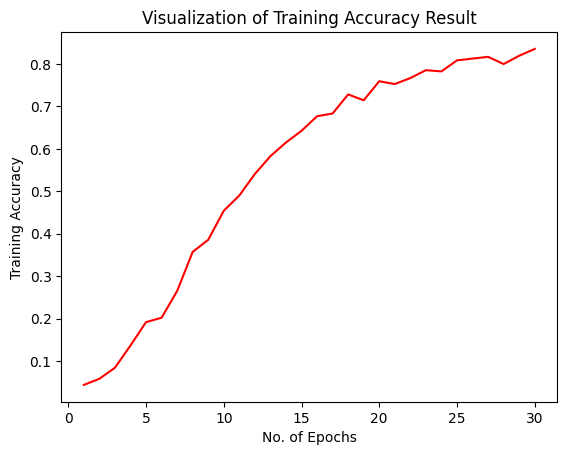

In [32]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color = 'red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

###Validation Accuracy

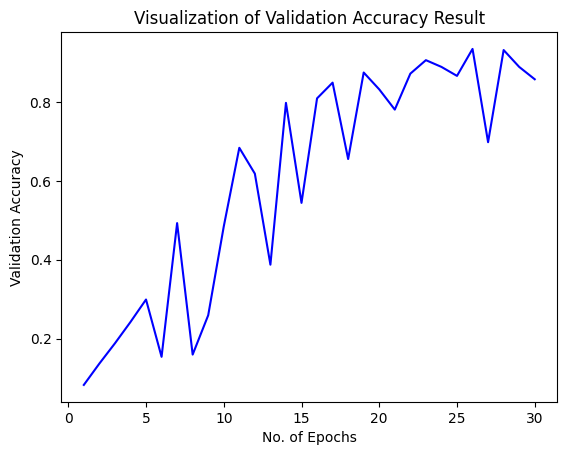

In [34]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()
